# Import basic libraries 

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
Video_FILE = r"C:\Users\ammar\Downloads\Johnny Depp’s Legal Team Takes Victory Lap Makes Statement on Verdict.mp4"

# Get frames

In [19]:
def get_frames(filename):
    video=cv2.VideoCapture(filename)
    while video.isOpened():
        rete,frame=video.read()
        if rete:
            yield frame
        else:
            break
        video.release()
        yield None

In [20]:
for f in get_frames(Video_FILE):
    if f is None:
        break
    cv2.imshow('frame',f)
    if cv2.waitKey(10) == 40:
        break
cv2.destroyAllWindows()

In [21]:
def get_frame(filename,index):
    counter=0
    video=cv2.VideoCapture(filename)
    while video.isOpened():
        rete,frame=video.read()
        if rete:
            if counter==index:
                return frame
            counter +=1
        else:
            break
    video.release()
    return None

In [23]:
frame = get_frame(Video_FILE,45)
print('shape is', frame.shape)
print('pixel at (60,21)',frame[60,21,:])
print('pixel at (120,10)',frame[120,10,:])

shape is (720, 1280, 3)
pixel at (60,21) [28  0  0]
pixel at (120,10) [32  0  0]


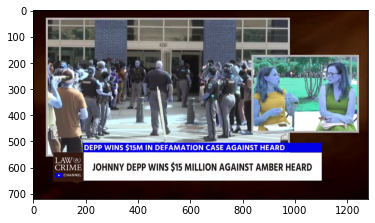

In [24]:
plt.imshow(frame)

# Frame Adjustment

pixel at (120,10) [ 0  0 32]


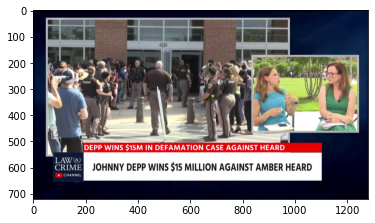

In [25]:
fix_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print('pixel at (120,10)',fix_frame[120,10,:])
plt.imshow(fix_frame)

# Crop a particular frame

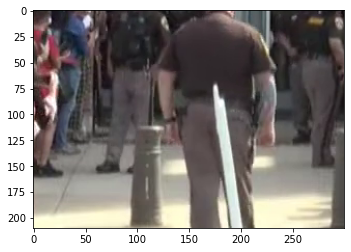

In [26]:
plt.imshow(fix_frame[220:430,300:600])

### Now thats legit LOL

# Adjust selected frames brightness

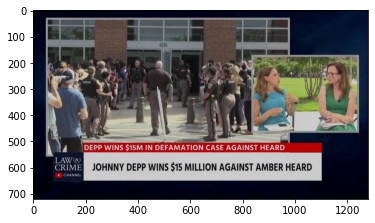

In [27]:
adjust_brightness=0.8*fix_frame
adjust_brightness=adjust_brightness.astype(np.uint8)
plt.imshow(adjust_brightness)

# Pinpoint something interesting

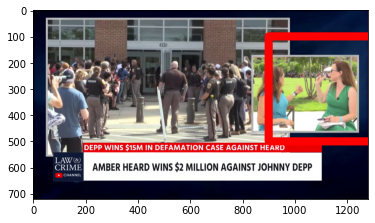

In [38]:
frame=get_frame(Video_FILE,200)
cv2.rectangle(frame,(900,100),(1300,500),color=(0,0,255),thickness=30)
fixed_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

### Ok we pointed the Side video Slide

# We are going to generate a new video file saved in the path C:\Users\ammar\Downloads

In [46]:
fourcc=cv2.VideoWriter_fourcc(*'MPV4')
video_out = cv2.VideoWriter(r'C:\Users\ammar\Downloads\new_video.mp4',fourcc,20,(650,490))
counter = 0
for frame in get_frames(Video_FILE):
    if frame is None:
        break
    cv2.putText(frame,text=str(counter), org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=3,
               color=(0,255,0),
               thickness=10)
    
    video_out.write(frame)
    counter +=1
video_out.release()

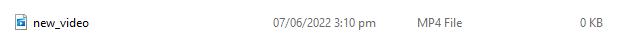

## image being download as shown

# Count frames in the file

In [45]:
VFILE = r'C:\Users\ammar\Downloads\new_video.mp4'
video=cv2.VideoCapture(VFILE)
count=int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('Total no of frames: ',count)

Total no of frames:  0


# Since its not downloaded its currently 0